# Telco Customer Churn - Modeling


### 01. Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')


### 02. Load Processed Data

In [15]:
train_df = pd.read_csv('../data/processed/train.csv')
test_df = pd.read_csv('../data/processed/test.csv')

print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

# Seperate features and target
target = 'Churn'
X_train_ber_res = train_df.drop(target, axis=1)
y_train_ber_res = train_df[target]
X_test = test_df.drop(target, axis=1)
y_test = test_df[target]

Train shape: (5634, 50)
Test shape: (1409, 50)


In [16]:
# --- Input/Output Data Inspection ---
print("Shape of Training Features (X_train_ber_res):", X_train_ber_res.shape)
print("Shape of Training Target (y_train_ber_res):", y_train_ber_res.shape)
print("Shape of Test Features (X_test):", X_test.shape)
print("Shape of Test Target (y_test):", y_test.shape)

print("\nFirst 5 rows of Input Features:")
display(X_train_ber_res.head())

print("\nFirst 5 rows of Target Labels (0 = No Churn, 1 = Churn):")
display(y_train_ber_res.head())

Shape of Training Features (X_train_ber_res): (5634, 49)
Shape of Training Target (y_train_ber_res): (5634,)
Shape of Test Features (X_test): (1409, 49)
Shape of Test Target (y_test): (1409,)

First 5 rows of Input Features:


,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,TenureCategory_Established,TenureCategory_Loyal,TenureCategory_New
0,0.102371,-0.521976,-0.262257,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,1,0,0
1,-0.711743,0.337478,-0.503635,0,1,1,0,0,1,0,...,0,1,0,0,0,0,1,1,0,0
2,-0.793155,-0.809013,-0.749883,0,1,1,0,0,1,0,...,1,1,0,0,0,0,1,1,0,0
3,-0.263980,0.284384,-0.172722,1,0,1,0,0,1,1,...,1,0,1,0,1,0,0,1,0,0
4,-1.281624,-0.676279,-0.989374,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1



First 5 rows of Target Labels (0 = No Churn, 1 = Churn):


0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

### 03. Class Imbalance Handling 
Applied **SMOTE** once to the training set to create a balanced dataset for all models

Original Class Distribution: Counter({0: 4139, 1: 1495})
Resampled Class Distribution: Counter({0: 4139, 1: 4139})


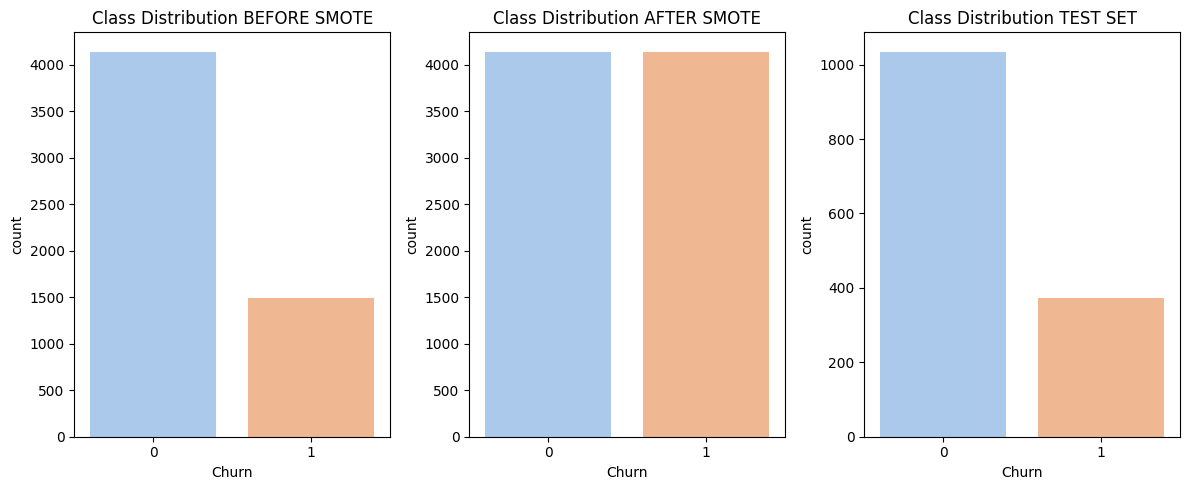

In [17]:
print("Original Class Distribution:", Counter(y_train_ber_res))

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train_ber_res, y_train_ber_res)

print("Resampled Class Distribution:", Counter(y_train))

# Visualization
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.countplot(x=y_train_ber_res, palette='pastel')
plt.title('Class Distribution BEFORE SMOTE')
plt.subplot(1, 3, 2)
sns.countplot(x=y_train, palette='pastel')
plt.title('Class Distribution AFTER SMOTE')
plt.subplot(1, 3, 3)
sns.countplot(x=y_test, palette='pastel')
plt.title('Class Distribution TEST SET')
plt.tight_layout()
plt.savefig('../artifacts/images/smote_class_distribution.png')
plt.show()

### 04. Model Development

- logistic regression
- decision tree
- random forest
- XGBoost
- CatBoost


#### 04.1 Logistic Regression